In [45]:
# necessary libraries. 
import numpy as np
import pandas as pd
import seaborn as se
from sklearn import linear_model as LM
from sklearn import neighbors as NB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import decomposition
import os

In [17]:
top_dir = '/home/owenwhitley/projects/dcgsa_hackathon'
data_dir = os.path.join(top_dir, 'data')
train_file = os.path.join(data_dir, 'train.csv')
test_file = os.path.join(data_dir, 'test.csv')
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

Our data consists of log fpkm values for 5 cell lines (A375, DLD1, GBM, HCT116, HELA, RPE1) and in subsequent columns (MAX and onwards) 1 for the presence of a protein protein interaction and 0 for the absense of an interaction.

In [18]:
train_data

,Unnamed: 0,IS_CORE_ESSENTIAL,A375,DLD1,GBM,HCT116,HELA,RPE1,MAX,MYCN,...,BNIP2,BNIP3,SUV39H1,TGFB2,TPD52,TPD52L1,VANGL1,CD82,MAST2,CDHR2
0,SLC7A4,0,-5.887,-5.845,-6.644,-6.644,-6.644,-5.265,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERCC4,1,2.344,2.051,2.604,2.239,2.795,2.246,0,0,...,0,0,0,0,0,0,0,0,0,0
2,EIF3G,1,7.561,7.053,6.966,7.232,6.758,6.816,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LARP1B,0,3.050,3.706,2.725,3.750,2.309,3.159,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DHX29,0,4.503,4.032,3.726,3.898,3.181,4.073,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,WDR13,0,5.391,6.390,5.277,5.297,5.640,5.233,0,0,...,0,0,0,0,0,0,0,0,0,0
2707,RPL29,1,9.948,10.408,9.862,10.019,9.013,9.449,0,0,...,0,0,0,0,0,0,0,0,0,0
2708,TRMU,0,4.153,5.689,4.532,5.266,5.306,5.272,0,0,...,0,0,0,0,0,0,0,0,0,0
2709,DHX9,1,6.822,6.726,6.558,6.943,6.084,6.365,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_data

,Unnamed: 0,IS_CORE_ESSENTIAL,A375,DLD1,GBM,HCT116,HELA,RPE1,MAX,MYCN,...,BNIP2,BNIP3,SUV39H1,TGFB2,TPD52,TPD52L1,VANGL1,CD82,MAST2,CDHR2
0,PDCD4,0,7.015,6.614,5.821,5.921,7.199,5.618,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DAXX,0,5.275,5.670,5.319,5.751,4.520,5.507,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RUNX3,0,3.581,-4.866,-4.808,3.612,0.051,-5.703,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TLE1,0,4.237,4.221,5.037,2.818,1.998,4.018,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GREM1,0,-5.200,-5.520,-6.322,-6.179,-3.027,7.558,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,TGFB2,0,-1.994,5.016,-0.448,-1.983,-0.146,6.664,0,0,...,0,0,0,0,0,0,0,0,0,0
674,TPD52,0,5.640,6.747,-5.381,6.984,6.346,1.369,0,0,...,0,0,0,0,1,1,0,0,0,0
675,TPD52L1,0,4.521,5.792,4.425,4.604,5.937,4.751,0,0,...,0,0,0,0,1,1,0,0,0,0
676,CD82,0,2.441,1.324,2.578,3.576,5.532,4.880,0,0,...,0,0,0,0,0,0,1,0,0,0


Setup train and test data. Train data is used to train model
Test data is used to assess how well model performs on unseen data

In [62]:
# columns 2 (0 is first column) and onwards give us our inputs
# column 1 gives us our label
X_train = train_data.iloc[:, 2:].to_numpy().astype('float32')
y_train = train_data.iloc[:, 1].to_numpy().astype('float32')

X_test = test_data.iloc[:, 2:].to_numpy().astype('float32')
y_test = test_data.iloc[:, 1].to_numpy().astype('float32')

In [63]:
X_train.shape

(2711, 3395)

In [64]:
y_train.shape

(2711,)

In [65]:
X_test.shape

(678, 3395)

In [66]:
y_test.shape

(678,)

Let's get the lay of the land: we run PCA to see data in reduced dimension space

In [28]:
pca_object = decomposition.PCA(n_components = 5)
pca_object.fit(X_train)
X_train_PCA = pca_object.transform(X_train)

In [29]:
X_train_PCA.shape

(2711, 5)

[Text(0.5, 0, 'PC'), Text(0, 0.5, 'Variance Explained')]

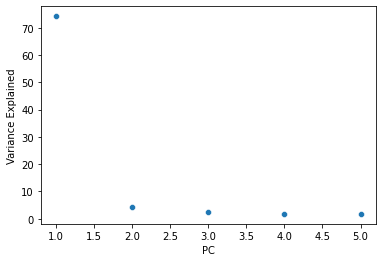

In [35]:
g = se.scatterplot(x = range(1, 6), y = pca_object.explained_variance_)
g.set(xlabel = 'PC', ylabel = 'Variance Explained')

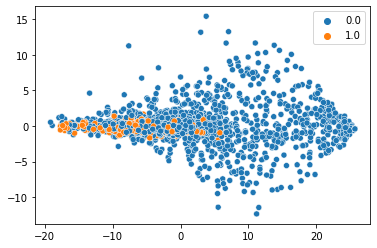

In [38]:
g = se.scatterplot(x = X_train_PCA[:, 0], y = X_train_PCA[:, 1], hue = y_train)

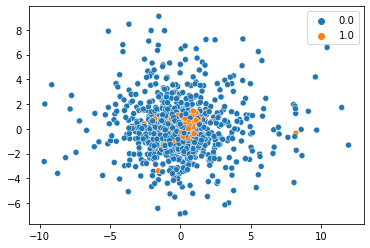

In [44]:
g = se.scatterplot(x = X_train_PCA[:, 2], y = X_train_PCA[:, 3], hue = y_train)

In [53]:
# Let's try logistic regression

logistic = LM.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 100)
logistic_param_grid = {'C': [1.0, 0.1],
                      'l1_ratio': [1.0, 0.5]}
logistic_CV_search = GridSearchCV(logistic, logistic_param_grid)
logistic_CV_search.fit(X_train[0:100, :], y_train[0:100])

/home/owenwhitley/anaconda3/envs/dcgsa_hackathon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/owenwhitley/anaconda3/envs/dcgsa_hackathon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/owenwhitley/anaconda3/envs/dcgsa_hackathon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/owenwhitley/anaconda3/envs/dcgsa_hackathon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which mean

GridSearchCV(estimator=LogisticRegression(penalty='elasticnet', solver='saga'),
             param_grid={'C': [1.0, 0.1], 'l1_ratio': [1.0, 0.5]})

In [55]:
logistic_CV_search.best_params_

{'C': 0.1, 'l1_ratio': 1.0}

In [67]:
# classifier doesn't do bad on train data
logistic_CV_search.score(X_train, y_train)

0.7864256731833272

In [68]:
# classifier doesn't do bad on test data
logistic_CV_search.score(X_test, y_test)

0.7831858407079646

In [83]:
# Try KNN
KNN = NB.KNeighborsClassifier()
KNN_param_grid = {'n_neighbors': range(10,16)}
KNN_CV_search = GridSearchCV(KNN, KNN_param_grid)
KNN_CV_search.fit(X_train[0:1000, :], y_train[0:1000])

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 16)})

In [84]:
KNN_CV_search.best_params_

{'n_neighbors': 10}

In [85]:
KNN_CV_search.score(X_train, y_train)

0.7967539653264478

In [86]:
KNN_CV_search.score(X_test, y_test)

0.7920353982300885